        book_id                                    title  \
0  LR_VDQAAQBAJ                              Bestsellers   
1  WcjTDQAAQBAJ                              Bestsellers   
2  4fXUDAAAQBAJ                      The Bestseller Code   
3  yIVuDwAAQBAJ                               Bestseller   
4  2JHXwAEACAAJ  Bestsellers: Popular Fiction since 1900   

                                            subtitle  \
0  The Path (bestsellers, free bestsellers, bests...   
1  Hell: A Place Without Hope (bestseller books, ...   
2                   Anatomy of the Blockbuster Novel   
3              A Century of America's Favorite Books   
4                                                NaN   

                            authors                  publisher published_date  \
0            Ivan King, bestsellers                bestsellers     2017-01-04   
1            Ivan King, bestsellers                bestsellers     2017-01-03   
2  Jodie Archer, Matthew L. Jockers                  Macmil

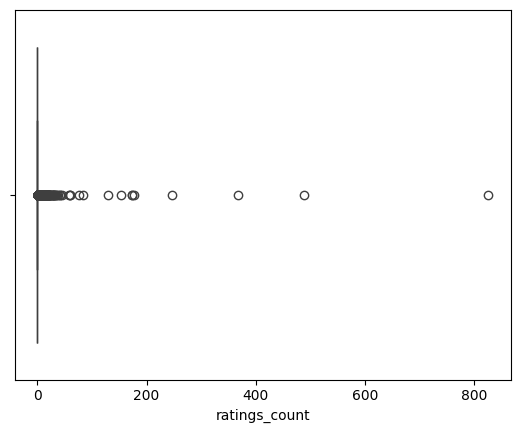

       ratings_count    z_score
7832              37   3.948515
13026            154  16.563699
13760             29   3.085938
13776             59   6.320601
13811            177  19.043607
13821             76   8.153576
13826            826  89.020140
13853             60   6.428423
13872            130  13.975969
13898             42   4.487625
13901             58   6.212779
14013             32   3.409405
14056             30   3.193760
14058            367  39.529803
14059            173  18.612318
14149             83   8.908331
14150             34   3.625049
14151             29   3.085938
14612             31   3.301582
14726             41   4.379803
14729            488  52.576275
14731            246  26.483331
14738            174  18.720141
14782             45   4.811092
14871             32   3.409405
14873             29   3.085938
14895             35   3.732871
                      published_date    page_count  average_rating  \
count                           60

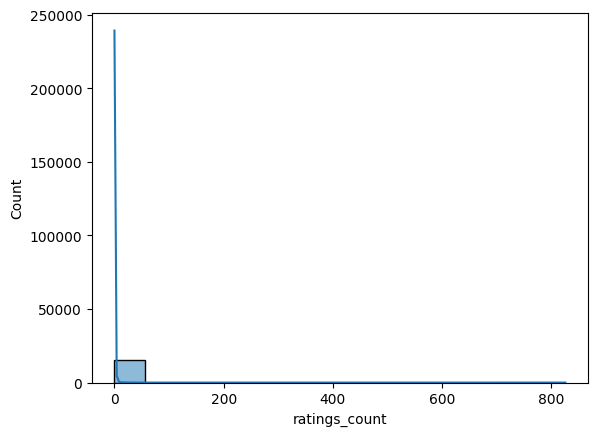

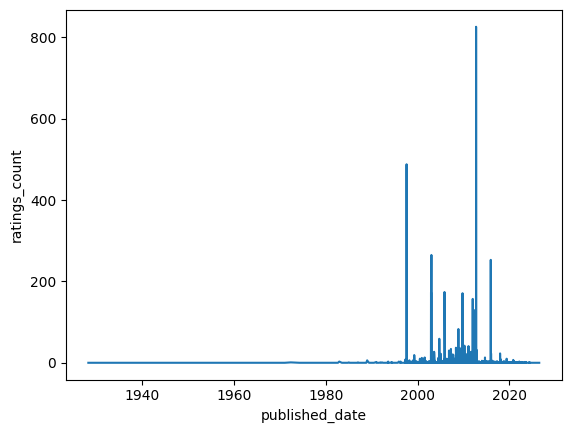

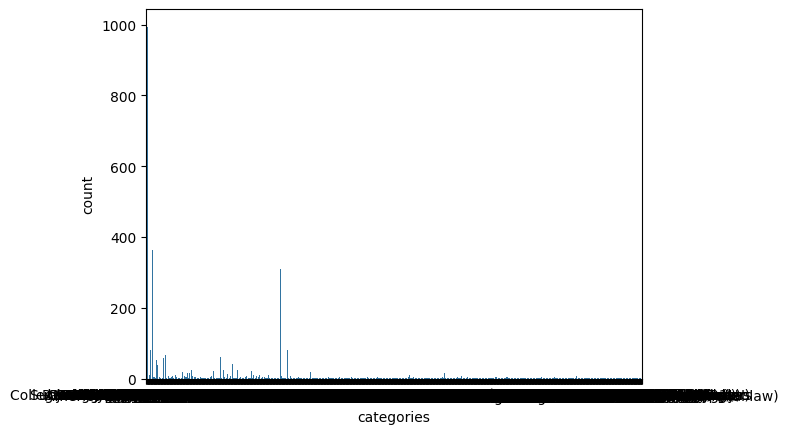

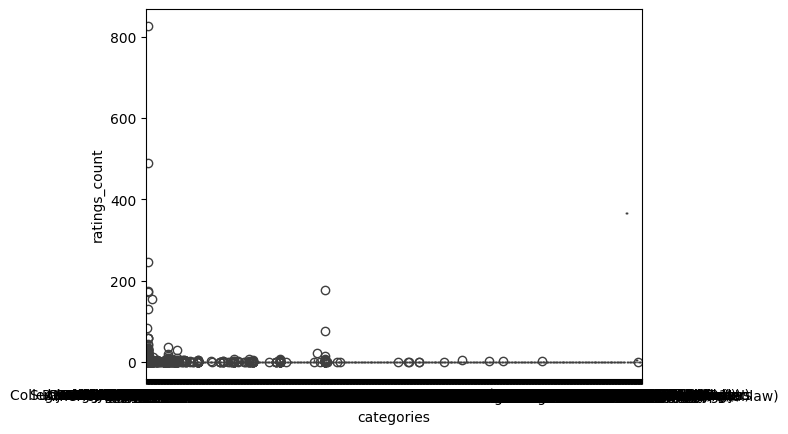

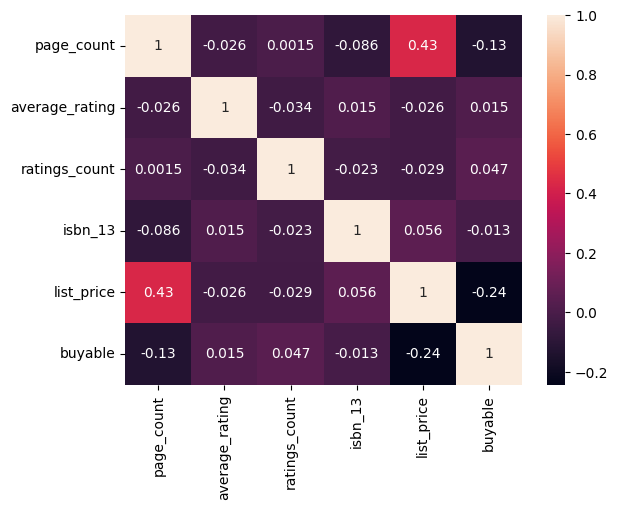

categories
1941                       0.0
35mm cameras               0.0
4-H clubs                  0.0
ANTIQUES & COLLECTIBLES    0.0
Abbreviations, French      0.0
                          ... 
Young adult fiction        0.0
Young adult literature     0.0
Zambia                     0.0
Zoology                    0.0
Ṣaqqārah (Egypt)           0.0
Name: ratings_count, Length: 1829, dtype: float64
                         page_count  ratings_count
categories                                        
1941                            0.0              0
35mm cameras                    0.0              0
4-H clubs                     506.0              0
ANTIQUES & COLLECTIBLES       299.0              0
Abbreviations, French         310.0              0
...                             ...            ...
Young adult fiction             0.0              0
Young adult literature        384.0              0
Zambia                        472.0              0
Zoology                      2688.0  

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('google_books_dataset.csv')
print(df.head())
df.info()
df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')

print(df.isnull().sum())
df['page_count'] = df['page_count'].fillna(df['page_count'].median())
print(df.isnull().sum())
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

sns.boxplot(x=df['ratings_count'])
plt.show()

df['z_score'] = (df['ratings_count'] - df['ratings_count'].mean()) / df['ratings_count'].std()
print(df[df['z_score'].abs() > 3][['ratings_count', 'z_score']])
df.drop('z_score', axis=1, inplace=True)

print(df.describe())
print(df['categories'].value_counts())
print(df.corr(numeric_only=True))

sns.histplot(df['ratings_count'], kde=True)
plt.show()

daily = df.groupby('published_date')['ratings_count'].sum().reset_index()
sns.lineplot(data=daily, x='published_date', y='ratings_count')
plt.show()

sns.countplot(data=df, x='categories')
plt.show()

sns.boxplot(data=df, x='categories', y='ratings_count')
plt.show()

sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

print(df.groupby('categories')['ratings_count'].mean())
print(df.groupby('categories').agg({'page_count': 'sum', 'ratings_count': 'sum'}))
print(df.pivot_table(values='ratings_count', index='published_date',
                     columns='categories', aggfunc='sum'))